In [1]:
import shutil
import os


original_dataset_dir = "./train"
train_cats_dir = "./train/cats"
train_dogs_dir = "./train/dogs"

fnames = ["dog.{}.jpg".format(i) for i in range(1000)]

for fname in fnames:
    from_data = original_dataset_dir + "/" + fname
    to_data = train_dogs_dir + "/" + fname
    shutil.copyfile(from_data, to_data)

fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
 
for fname in fnames:
    from_data = original_dataset_dir + "/" + fname
    to_data = train_cats_dir + "/" + fname
    shutil.copyfile(from_data, to_data)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
 
for fname in fnames:
    from_data = original_dataset_dir + "/" + fname
    to_data = train_dogs_dir + "/" + fname
    shutil.copyfile(from_data, to_data)

In [2]:
validation_cats_dir = "validation/cats"
validation_dogs_dir = "validation/dogs"


fnames = ["cat.{}.jpg".format(i) for i in range(1000,1500)]
 
for fname in fnames:
    from_data = original_dataset_dir + "/" + fname
    to_data = validation_cats_dir + "/" + fname
    shutil.copyfile(from_data, to_data)
 
fnames = ["dog.{}.jpg".format(i) for i in range(1000,1500)]
 
for fname in fnames:
    from_data = original_dataset_dir + "/" + fname
    to_data = validation_dogs_dir + "/" + fname
    shutil.copyfile(from_data, to_data)

In [3]:
test_cats_dir = "test/cats"
test_dogs_dir = "test/dogs"

fnames = ["cat.{}.jpg".format(i) for i in range(1500,2000)]
 
for fname in fnames:
    from_data = original_dataset_dir + "/" + fname
    to_data = test_cats_dir + "/" + fname
    shutil.copyfile(from_data, to_data)
 
fnames = ["dog.{}.jpg".format(i) for i in range(1500,2000)]
 
for fname in fnames:
    from_data = original_dataset_dir + "/" + fname
    to_data = test_dogs_dir + "/" + fname
    shutil.copyfile(from_data, to_data)

In [4]:
print("train cat:{}".format(len(os.listdir(train_cats_dir))))
print("train dog:{}".format(len(os.listdir(train_dogs_dir))))
 
print("validation cat:{}".format(len(os.listdir(validation_cats_dir))))
print("validation dog:{}".format(len(os.listdir(validation_dogs_dir))))
 
print("test cat:{}".format(len(os.listdir(test_cats_dir))))
print("test dog:{}".format(len(os.listdir(test_dogs_dir))))

train cat:1001
train dog:1001
validation cat:501
validation dog:501
test cat:501
test dog:501


In [5]:
# ネットワークの作成
from keras import layers
from keras import models
 
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
 
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
 
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
 
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
 
model.add(layers.Flatten())
 
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

2021-12-21 06:45:22.389978: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-21 06:45:22.391903: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-21 06:45:22.397965: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
from keras import optimizers

# 2値分類では、活性化関数は「sigmoid」、損失関数は「binary_crossentropy」を使うのが一般的
model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=["acc"])

学習にかけるためには、画像ファイルに以下の前処理を行う

1. 画像ファイルを読み込む
1. 浮動小数点数型(float型)にする
1. ピクセル値(0-255)を、[0,1]の範囲の値にする

* target_sizeは、画像のサイズです。上では150,150のサイズにリサイズします。
* batch_sizeは、一度に処理する画像の枚数です。20枚を1バッチとします。
* class_modeは、”binary”として二値のラベルを作成します。

In [7]:
from keras.preprocessing.image import ImageDataGenerator
import scipy

train_dir = "train"
validation_dir = "validation"

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="binary"
)
 
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data,label in train_generator:
    print(data.shape)
    print(label.shape)
    break


(20, 150, 150, 3)
(20,)

(20, 150, 150, 3)
(20,)


(20,)

In [9]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

/home/cruciani/anaconda3/envs/python37/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-12-21 06:45:23.641089: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-21 06:45:23.644951: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2095985000 Hz


Epoch 1/30
100/100 [==============================] - 40s 380ms/step - loss: 0.6926 - acc: 0.5154 - val_loss: 0.6686 - val_acc: 0.6010
Epoch 2/30
100/100 [==============================] - 35s 347ms/step - loss: 0.6547 - acc: 0.6219 - val_loss: 0.6222 - val_acc: 0.6520
Epoch 3/30
100/100 [==============================] - 32s 315ms/step - loss: 0.5786 - acc: 0.7055 - val_loss: 0.6154 - val_acc: 0.6550
Epoch 4/30
100/100 [==============================] - 30s 301ms/step - loss: 0.5607 - acc: 0.7125 - val_loss: 0.5864 - val_acc: 0.6920
Epoch 5/30
100/100 [==============================] - 30s 296ms/step - loss: 0.5382 - acc: 0.7150 - val_loss: 0.6195 - val_acc: 0.6560
Epoch 6/30
100/100 [==============================] - 32s 322ms/step - loss: 0.5150 - acc: 0.7425 - val_loss: 0.6085 - val_acc: 0.6600
Epoch 7/30
100/100 [==============================] - 31s 312ms/step - loss: 0.4946 - acc: 0.7375 - val_loss: 0.6014 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 3

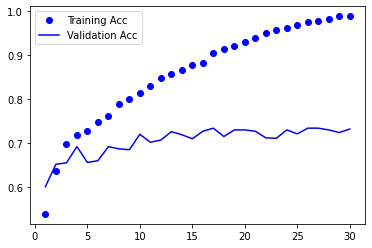

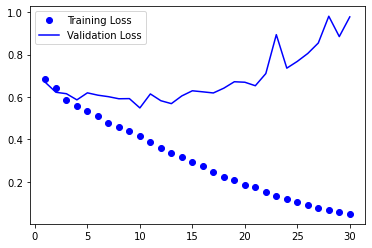

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
 

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
 
epochs = range(1,len(acc) + 1)
 
plt.plot(epochs, acc,"bo",label="Training Acc")
plt.plot(epochs, val_acc,"b",label="Validation Acc")
plt.legend()
 
plt.figure()
 
plt.plot(epochs,loss,"bo",label="Training Loss")
plt.plot(epochs,val_loss,"b",label="Validation Loss")
plt.legend()
 
plt.show()